# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

c:\Users\kalik\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}'
# units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | nizhniy kuranakh
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | poshekhonye
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | lesozavodsk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | port hardy
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | wenatchee
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | mehamn
Processing Record 22 of Set 1 | faanui
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns =['City','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed','Country','Date'])

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,33.57,23,0,8.23,US,1691889291
1,pisco,-13.7000,-76.2167,19.03,77,0,6.17,PE,1691889291
2,nizhniy kuranakh,58.8353,125.4869,22.29,68,75,1.60,RU,1691889292
3,georgetown,5.4112,100.3354,28.86,89,40,1.54,MY,1691889112
4,poshekhonye,58.4993,39.1353,19.70,66,0,4.48,RU,1691889292


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,33.57,23,0,8.23,US,1691889291
1,pisco,-13.7000,-76.2167,19.03,77,0,6.17,PE,1691889291
2,nizhniy kuranakh,58.8353,125.4869,22.29,68,75,1.60,RU,1691889292
3,georgetown,5.4112,100.3354,28.86,89,40,1.54,MY,1691889112
4,poshekhonye,58.4993,39.1353,19.70,66,0,4.48,RU,1691889292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

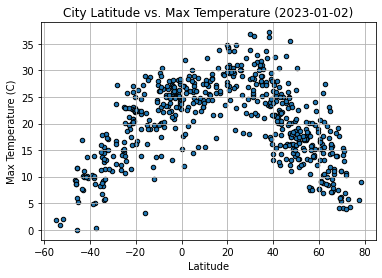

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',y='Max Temp', grid =True, edgecolors='black', ylabel= ('Max Temperature (C)'), xlabel= ('Latitude'), title=('City Max Latitude vs. Temperature (2023-01-02)'))


# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature (2023-01-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

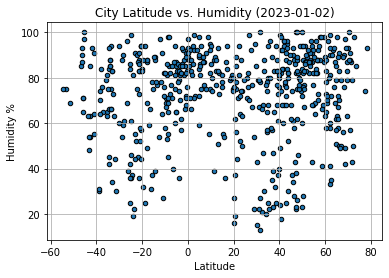

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',y='Humidity', grid =True, edgecolors='black', ylabel= ('Humidity %'), xlabel= ('Latitude'), title=('City Latitude vs. Humidity (2023-01-02)'))

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Humidity (2023-01-02)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

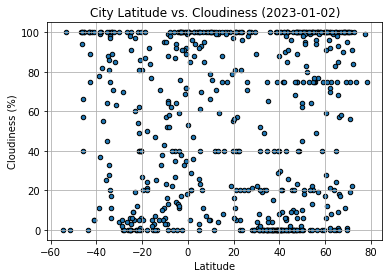

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',y='Cloudiness', grid =True, edgecolors='black', ylabel= ('Cloudiness %'), xlabel= ('Latitude'), title=('City Latitude vs. Cloudiness (2023-01-02)'))

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2023-01-02)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

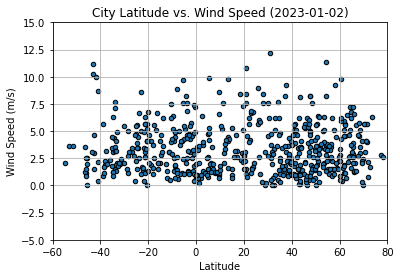

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',y='Wind Speed', grid =True, edgecolors='black', ylabel= ('Wind Speed (m/s)'), xlabel= ('Latitude'), title=('City Latitude vs. Wind Speed (2023-01-02)'))

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2023-01-02)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.xlim(-60, 80)
plt.ylim(-5, 15)




# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,33.57,23,0,8.23,US,1691889291
2,nizhniy kuranakh,58.8353,125.4869,22.29,68,75,1.60,RU,1691889292
3,georgetown,5.4112,100.3354,28.86,89,40,1.54,MY,1691889112
4,poshekhonye,58.4993,39.1353,19.70,66,0,4.48,RU,1691889292
5,kapaa,22.0752,-159.3190,30.18,71,40,6.17,US,1691889292


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pisco,-13.7000,-76.2167,19.03,77,0,6.17,PE,1691889291
6,hermanus,-34.4187,19.2345,8.22,84,100,4.36,ZA,1691889293
10,vila velha,-20.3297,-40.2925,22.97,83,0,5.66,BR,1691889294
12,hobart,-42.8794,147.3294,10.03,63,75,4.63,AU,1691889295
16,avarua,-21.2078,-159.7750,27.03,83,40,3.09,CK,1691889296


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6608685350094117


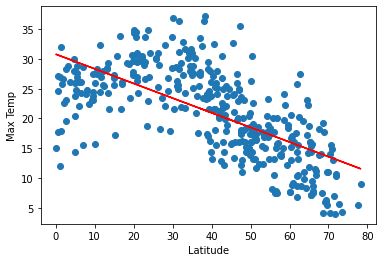

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7966672152694494


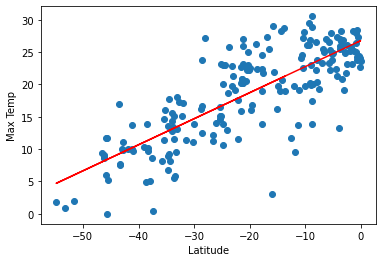

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.007436973405444039


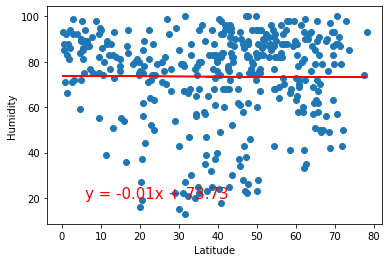

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.128023232871747


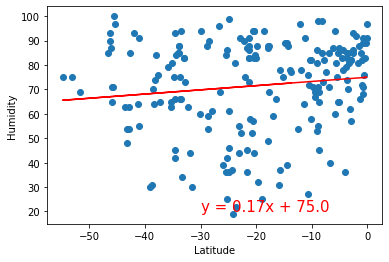

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.050261200757706535


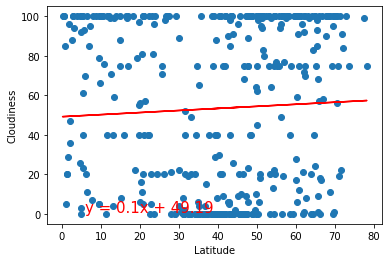

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.06346065883843394


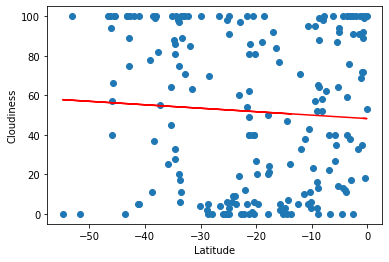

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027681073299569096


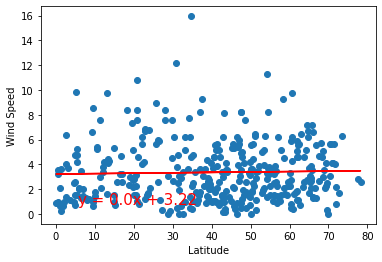

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.06505935063042045


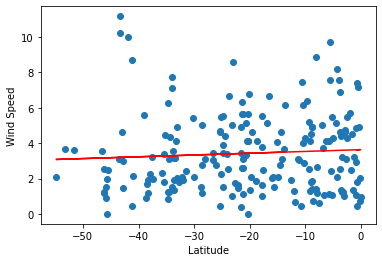

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [27]:
#A moderate negative correlation of -0.66 exists between temperature and latitude in the northern hemisphere. There exists a strong positive correlation of 0.79 between temperature and latitude in the southern hemisphere. This means that as you move closer to the equator, the temperature increases.